# An introduction to Gravitational Waves and Standard Sirens


Author: Reed Essick

Gravitational waves, as described by General Relativity (GR), are distortions in the space-time metric caused by accelerating stress-energy. It's not as intimidating as it sounds, and in fact it works a lot like electromagnetic radiaion, with which you're likely more familiar.  

## What generates EM radiation?

Electromagnetic radiation is created by accelerating charges or currents. This is how radios work. Your phone, for example, drives a current through an antenna, that current in turn generates electromagnetic waves that carry energy and momentum far away from the antenna. Other antennas in the *radiation field* can pick up on this energy-momentum, decoding the signal to drive a speaker, receive a text, or watch youtube.

Similarly, radio signals from distant stars and galaxies are created by accelerating charges in those galaxies and then travel through space to Earth, where we record them with devices (antennas) sensitive to the electromagnetic energy in the radio waves.

## What generated GW radiation?

Much like EM radiation, GWs are generated by accelerating bodies. However, it is not the electric charge that sources GWs, but rather mass and engery itself. This is similar to how electric charges create electric fields and mass-energy creates gravitational fields. When mass or energy accelerates, GWs are created and they carry energy and momentum far away from the source.

One of the main differences between gravity and electromagnetism is that gravity is *much, much weaker* than electromagnetism. This is why the electromagnetic forces generated by your muscles can support your body against the gravitational field generated by the entire Earth. Similarly, GWs are generally much harder to generate than EM waves, and require *very* large masses moving *very* quickly, at times approaching speeds comparable to the speed of light. This is difficult to do in a laboratory, which is why we rely on astrophysical bodies to generate GWs.

## What do GW signals look like?

As it turns out, several types of stellar remnants, **Black Holes** and **Neutron Stars**, are massive enough and can form orbits close enough to generate a significant amount of GWs. For example, GW150914 [1] contained 2 Black Holes that were  

  * $\sim36$ and $\sim29$ times the mass of the sun, respectively
  * $\sim106$ and $\sim86$ km in radius, a little more ten times the distance between Hyde Park and the loop
  * reached relative velocities $\gtrsim50\%$ the speed of light
  * peak luminosity of GW150914 $\mathcal{L}\sim3.6\times10^{56}$ erg/s, compared to $\sim10^{52}$ erg/s for most supernova

GWs from Compact Binary Coalescences (CBCs) have a characteristic *chirp* shape. This is because as the bodies orbit, they accelerate (change direction). As they accelerate, they radiate GWs. Those GWs carry away energy and momentum, which comes out of the orbital binding energy. As the orbit loses energy, the objects fall closer together (more tightly bound) and orbit faster. As they orbit faster, they radiate faster, and fall together faster, causing a run-away process until they merge.

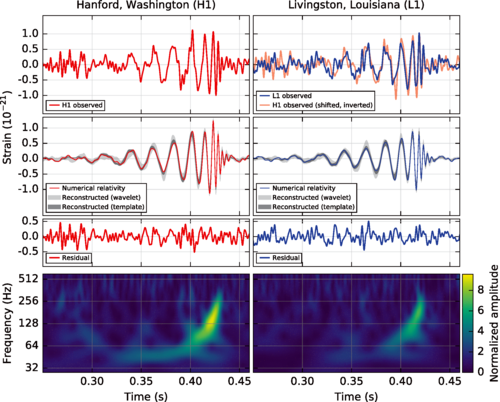

The bottom panel here shows *time* on the x-axis and *frequency* on the y-axis, and we see that both the amplitude (brightness) and the frequency increase at later times.

  
[1] Abbott et al. *Observation of Gravitational Waves from a Binary Black Hole Merger*. PRL 116, 061102 (2016). https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.116.061102

## How can we measure Hubble's constant with GWs and EM signals?

GR predicts the waveform $h(t)$ produced by different types of stellar collisions. A very basic approximation takes the form [2]
$$
    h(t) = \frac{1}{D}\int df \mathcal{M}^2 e^{i(2\pi f t + \Psi(f))}  \left(\mathcal{M}f\right)^{-7/6}
$$
where $\mathcal{M}$, called the *chirp mass*, is a particular combination of the component masses: 
$$
\mathcal{M}=(m_1m_2)^{3/5}/(m_1+m_2)^{1/5}
$$
and
$$
\Psi(f) = 2\pi f t_c + 3/128 (\pi \mathcal{M} f)^{-5/3}
$$

Note that this simple waveform depends on the **component masses** and the **distance** to the source. The frequency-evolution of the signal only depends on the masses while the overall amplitude depends on both the masses and the distance. Therefore, if we can measure the masses from the frequency evolution, we can then also determine the distance from the amplitude.

This means that **GWs act as "standard sirens"** in that we know how loud they are intrinsically and therefore know how far away they were based on what we observed on Earth. If another observation, say EM measurements of the host galaxy, determine the redshift $z$, then we can estimate Hubbles constant via
$$
  H_0 = \frac{z}{D}
$$
with the redshift taken from EM observations and the distance taken from GW observations. Note, this is independent of the normal distance-ladder used to calibrate Supernova/standard candle observations.

[2] Buonanno et al. *Comparison of post-Newtonian templates for compact binary inspiral signals in gravitational-wave detectors.* PRD 80, 084043 (2009). https://journals.aps.org/prd/abstract/10.1103/PhysRevD.80.084043

### Exercise

Can you fit a model I produced earlier with our simple waveform? 

  * Try changing the *chirp mass* first to get the maxima and minima to line up.
  * Then change the *distance* to get the amplitudes to match.

How close can you get the waveforms to match? How certain are you that the best-fit parameters are the actual parameters I used to generate the target waveform?

/Users/chihwaychang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/Users/chihwaychang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')
/Users/chihwaychang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in power
/Users/chihwaychang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in power
/Users/chihwaychang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in multiply
/Users/chihwaychang/anaconda3/lib/python3.6/site-package

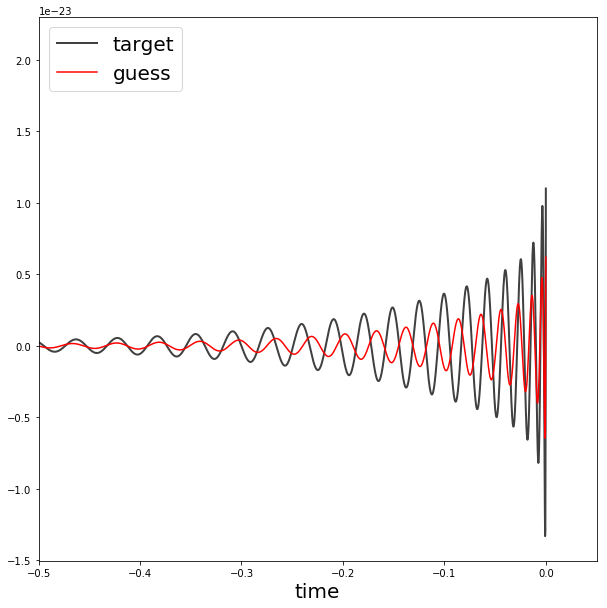

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# define a simple waveform generator
Msun=1.989e30 # kg
G=6.67e-11 # N m^2/kg^2
c=3e8 # m/s

def waveform(Mc, D, srate=4096, seglen=32):
    dt = 1./srate
    t = np.arange(0, 32, dt)
    freq = np.fft.fftfreq(len(t), dt)
    
    Mc *= Msun*G/c**3
    D *= 3.086e22
    
    psi = (3/128)*np.abs(np.pi*Mc*freq)**(-5./3)
    psi[np.abs(freq)<1] = 0.
    h = Mc**2 * np.exp(1j*psi) * np.abs(Mc*freq)**(-7./6) / D
    h[np.abs(freq)<1] = 0.
    h[np.abs(freq)>(6**(1.5)*np.pi*Mc*G/c**3)**-1] = 0
    
    window = freq**6/(1+np.abs(freq/32)**6) * 1/(1 + np.abs(freq/1024)**6)
    h *= window
    
    return (t, np.fft.ifft(h).real)

fig = plt.figure(figsize=(10,10))

# plot a waveform I made previously
t_target, h_target = np.load('target_waveform.npy')
plt.plot(t_target-max(t_target), h_target, linewidth=2, color='k', alpha=0.75, label='target')
plt.xlabel('time',fontsize=20)
plt.xlim(xmin=-0.5, xmax=0.05)

# guess a new waveform
# **YOU SHOULD CHANGE THESE NUMBERS TO SEE HOW WELL YOU CAN FIT THE EXAMPLE WAVEFORM**
Mc_guess = 33.15 # measured in Msun
D_guess = 452 # measured in Mpc

(t, h) = waveform(Mc_guess, D_guess)

plt.plot(t-max(t), h, color='r', label='guess')
plt.legend(loc='upper left',fontsize=20)
plt.show()

Now, for this made-up signal, let us assume that an electromagnetic counterpart was observed with $z=0.05$. *Can you estimate $H_0$?*

In [3]:
print('H0 = %.1f km/s/Mpc'%(3e5*0.05/D_guess))


H0 = 33.2 km/s/Mpc


## How can you learn more about GWs?

The [GW-Open Science center](https://www.gw-openscience.org/about/) has a lot of great resources, including tutorials that will let you [discovery GWs on your own](https://www.gw-openscience.org/GW150914data/GW150914_tutorial.html).